## Capstone Project - The Battle of Neighborhoods (Week 1)

#### *DISCLAIMER: As It has been impossible to use Foursquare API I have decided to use other data and make a project about that instead. It still is geographical based.*

Libraries and dependencies

In [32]:
import json
import numpy as np
import pandas as pd

# Plotting packages
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl

# Lib to create maps
import folium 
from folium import Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# To display stuff in notebook
from IPython.display import display, Markdown

---
### First dataset: Geographical positions of air measurement stations in all Europe

In [33]:
# Dataset that containis the location of air quality measurement station in Europe
!wget https://ui1-tfm-data.s3.amazonaws.com/air-data/stations.json

# Load the file
data = json.load(open('stations.json'))

# Create the dataframe
df_stations = pd.DataFrame(data["data"])
df_stations.head()

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


,index,StationLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,CountryOrTerritory,Pollutant
0,0,GIB_Station_GB0050A,36.133317,-5.353175,Gibraltar,o-Xylene (air)
1,1,GIB_Station_GB0051A,36.112824,-5.350188,Gibraltar,Particulate matter < 10 Âµm (aerosol)
2,2,GIB_Station_GB0951A,36.128068,-5.351246,Gibraltar,Nitrogen oxides (air)
3,4,HR_DOC_TYPE_D_STA_RH0101,45.800339,15.974072,Croatia,indeno_123cd_pyrene in PM10 (aerosol)
4,5,HR_DOC_TYPE_D_STA_RH0103,45.764947,16.006469,Croatia,indeno_123cd_pyrene in PM10 (aerosol)


In [34]:
df_stations = df_stations[['StationLocalId', 'SamplingPoint_Latitude', 'SamplingPoint_Longitude', 'CountryOrTerritory', 'Pollutant']]
df_stations.head()
# len(df_stations)

,StationLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,CountryOrTerritory,Pollutant
0,GIB_Station_GB0050A,36.133317,-5.353175,Gibraltar,o-Xylene (air)
1,GIB_Station_GB0051A,36.112824,-5.350188,Gibraltar,Particulate matter < 10 Âµm (aerosol)
2,GIB_Station_GB0951A,36.128068,-5.351246,Gibraltar,Nitrogen oxides (air)
3,HR_DOC_TYPE_D_STA_RH0101,45.800339,15.974072,Croatia,indeno_123cd_pyrene in PM10 (aerosol)
4,HR_DOC_TYPE_D_STA_RH0103,45.764947,16.006469,Croatia,indeno_123cd_pyrene in PM10 (aerosol)


In [35]:
# Filter the stations to get the ones in Spain
df_stations_spain = df_stations.loc[df_stations['CountryOrTerritory'] == 'Spain']

# The delete the ones outside the main land (Isles)
# v.lat > 35.512 AND v.lat < 44.512 AND v.lon > -10.415 AND v.lon < 5.054
df_stations_spain = df_stations_spain[(df_stations_spain.SamplingPoint_Latitude > 35.512) & (df_stations_spain.SamplingPoint_Latitude < 44.512) & (df_stations_spain.SamplingPoint_Longitude > -10.415) & (df_stations_spain.SamplingPoint_Longitude < 5.054)]

# Select the main fields
df_stations_spain = df_stations_spain[['StationLocalId', 'SamplingPoint_Latitude', 'SamplingPoint_Longitude']] #, 'Pollutant']]

# Rename to better understanding
df_stations_spain.columns = ['Station', 'Latitude', 'Longitude']

# Reset the index
df_stations_spain = df_stations_spain.reset_index(drop=True)

print(len(df_stations_spain))
df_stations_spain.head()

493


,Station,Latitude,Longitude
0,STA_ES0001R,39.54694,-4.35056
1,STA_ES0005R,42.72056,-8.92361
2,STA_ES0006R,39.87528,4.31639
3,STA_ES0007R,37.23722,-3.53417
4,STA_ES0008R,43.43917,-4.85000


In [36]:
# See the unique values
len(df_stations_spain.Station.unique())

493

---
### Location of air quality measurement station in Spain (mainland)

In [37]:
# v.lat > 35.512 AND v.lat < 44.512 AND v.lon > -10.415 AND v.lon < 5.054
lower_left = [35.512, -10.415]
upper_right = [44.512, 5.054]
m = folium.Map(width=1000, height=1000, location=[40.4168, -3.7038], tiles='cartodbpositron', zoom_start=6)

# Add points to the map
for idx, row in df_stations_spain.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Station']).add_to(m)

m

---
### Second dataset: Pollutant measurements made in Spain in 1 month

In [12]:
# Dataset with Pollutant measurements made in Spain in 1 month (January 2020)
!wget https://ui1-tfm-data.s3.amazonaws.com/air-data/spain_airQuality.csv

# Load the file and create dataframe
df = pd.read_csv('spain_airQuality.csv')
df.head()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,ES,ES.BDCA.AQD,NET_ES214A,STA_ES1633A,ES1633A,SP_30030007_7_8,SPP_30030007_7_8.1,SAM_30030007_7_8,NO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,36.0,µg/m3,2020-01-01 00:00:00 +01:00,2020-01-01 01:00:00 +01:00,1,3
1,ES,ES.BDCA.AQD,NET_ES214A,STA_ES1633A,ES1633A,SP_30030007_7_8,SPP_30030007_7_8.1,SAM_30030007_7_8,NO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,68.0,µg/m3,2020-01-01 01:00:00 +01:00,2020-01-01 02:00:00 +01:00,1,3
2,ES,ES.BDCA.AQD,NET_ES214A,STA_ES1633A,ES1633A,SP_30030007_7_8,SPP_30030007_7_8.1,SAM_30030007_7_8,NO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,58.0,µg/m3,2020-01-01 02:00:00 +01:00,2020-01-01 03:00:00 +01:00,1,3
3,ES,ES.BDCA.AQD,NET_ES214A,STA_ES1633A,ES1633A,SP_30030007_7_8,SPP_30030007_7_8.1,SAM_30030007_7_8,NO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,47.0,µg/m3,2020-01-01 03:00:00 +01:00,2020-01-01 04:00:00 +01:00,1,3
4,ES,ES.BDCA.AQD,NET_ES214A,STA_ES1633A,ES1633A,SP_30030007_7_8,SPP_30030007_7_8.1,SAM_30030007_7_8,NO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,42.0,µg/m3,2020-01-01 04:00:00 +01:00,2020-01-01 05:00:00 +01:00,1,3


In [13]:
len(df)

12850337

In [14]:
# Check the number of null entries
df.isnull().sum(axis = 0)

Countrycode                       0
Namespace                         0
AirQualityNetwork                 0
AirQualityStation                 0
AirQualityStationEoICode          0
SamplingPoint                     0
SamplingProcess                   0
Sample                         6717
AirPollutant                      0
AirPollutantCode                  0
AveragingTime                     0
Concentration               1078847
UnitOfMeasurement                 0
DatetimeBegin                     0
DatetimeEnd                       0
Validity                          0
Verification                      0
dtype: int64

In [15]:
# Select the relevant fields
df_measurements = df[['AirQualityStation', 'AirPollutant', 'Concentration', 'UnitOfMeasurement', 'DatetimeBegin']]

# Rename fields to better understanding
df_measurements.columns =['Station', 'AirPollutant', 'Concentration', 'UnitOfMeasurement', 'Datetime']

# Delete entrie with null measurements
df_measurements = df_measurements[df_measurements['Concentration'].notna()]

# Change date to a standard format
df_measurements['Datetime'] = pd.to_datetime(df_measurements['Datetime'])

# Select entries corrsponding to a certain month (January 2020)
df_measurements = df_measurements.loc[df_measurements['Datetime'] < '2020-2-1']

# Reset index
df_measurements = df_measurements.reset_index(drop=True)

1956447 entries

In [16]:
print(len(df_measurements))
df_measurements.head(5)

1956447


,Station,AirPollutant,Concentration,UnitOfMeasurement,Datetime
0,STA_ES1633A,NO,36.0,µg/m3,2020-01-01 00:00:00+01:00
1,STA_ES1633A,NO,68.0,µg/m3,2020-01-01 01:00:00+01:00
2,STA_ES1633A,NO,58.0,µg/m3,2020-01-01 02:00:00+01:00
3,STA_ES1633A,NO,47.0,µg/m3,2020-01-01 03:00:00+01:00
4,STA_ES1633A,NO,42.0,µg/m3,2020-01-01 04:00:00+01:00


---
### Join both dataframes and start the study

In [17]:
# Time to merge both dataframes to get the location of each measurement.
combined_df = df_measurements.merge(df_stations_spain, left_on='Station', right_on='Station')
combined_df = combined_df[['AirPollutant', 'Concentration', 'UnitOfMeasurement', 'Station', 'Latitude', 'Longitude', 'Datetime']]

1646807 entries

In [18]:
print(len(combined_df))
combined_df.head(5)

1646807


,AirPollutant,Concentration,UnitOfMeasurement,Station,Latitude,Longitude,Datetime
0,NO,36.0,µg/m3,STA_ES1633A,37.993611,-1.144722,2020-01-01 00:00:00+01:00
1,NO,68.0,µg/m3,STA_ES1633A,37.993611,-1.144722,2020-01-01 01:00:00+01:00
2,NO,58.0,µg/m3,STA_ES1633A,37.993611,-1.144722,2020-01-01 02:00:00+01:00
3,NO,47.0,µg/m3,STA_ES1633A,37.993611,-1.144722,2020-01-01 03:00:00+01:00
4,NO,42.0,µg/m3,STA_ES1633A,37.993611,-1.144722,2020-01-01 04:00:00+01:00



The final dataset will be composed of the next fields:


*   **Station**: Id of the measurement station
*   **AirPollutant**: Name of the measured air pollutant
*   **Concentration**: Concentration measured for each type of pollutant
*   **UnitOfMeasurement**: Unit of measurement for each type of pollutant
*   **Datetime**: Initial hour (date) of each measurement

<br>

---

In [38]:
# Field types
combined_df.dtypes

AirPollutant                                       object
Concentration                                     float64
UnitOfMeasurement                                  object
Station                                            object
Latitude                                          float64
Longitude                                         float64
Datetime             datetime64[ns, pytz.FixedOffset(60)]
dtype: object

---
### Data visualization

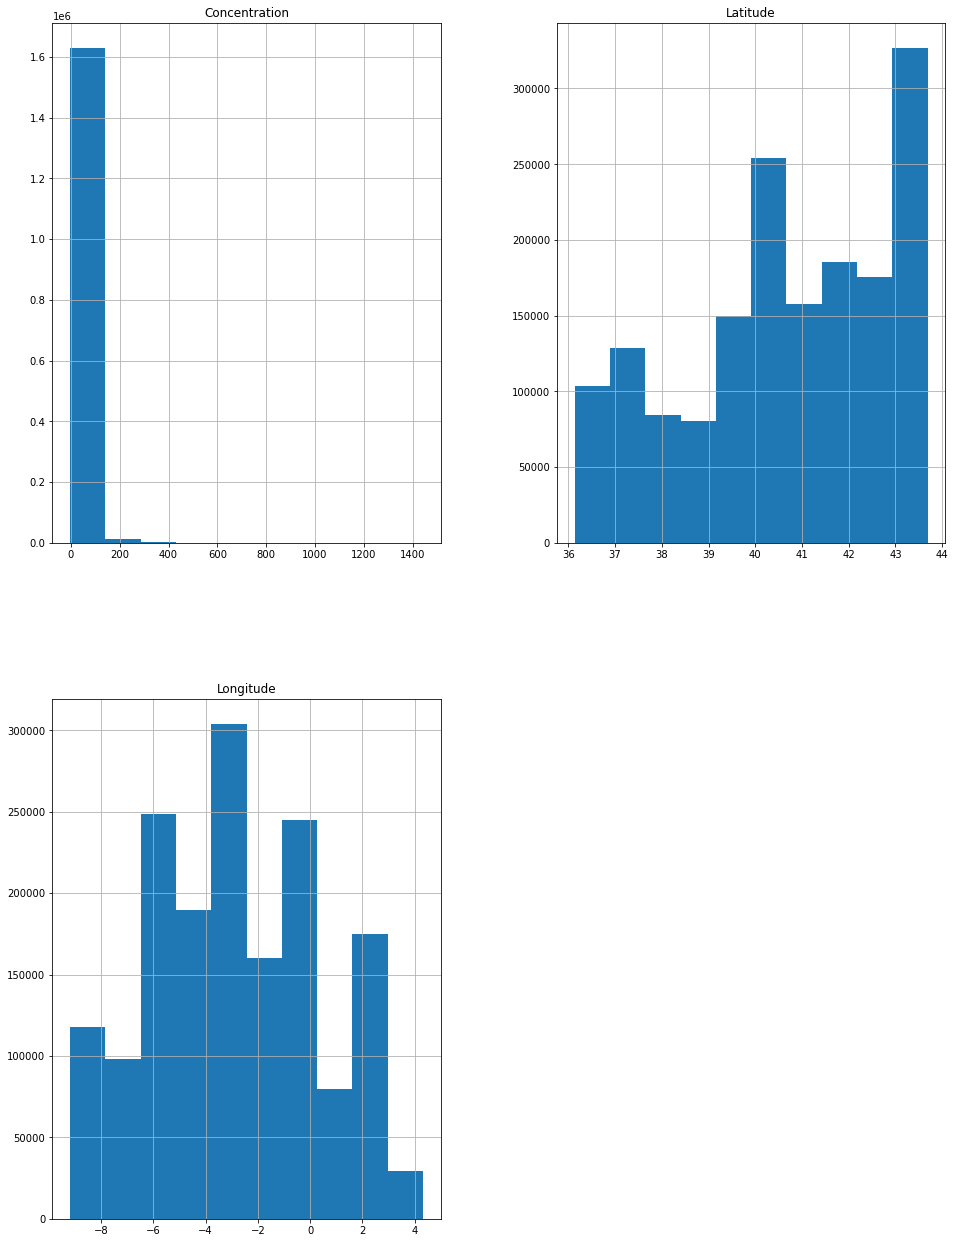

In [20]:
# Histograms of concentration, latitude and longitude.
combined_df.hist(figsize=(16,22))
plt.show()

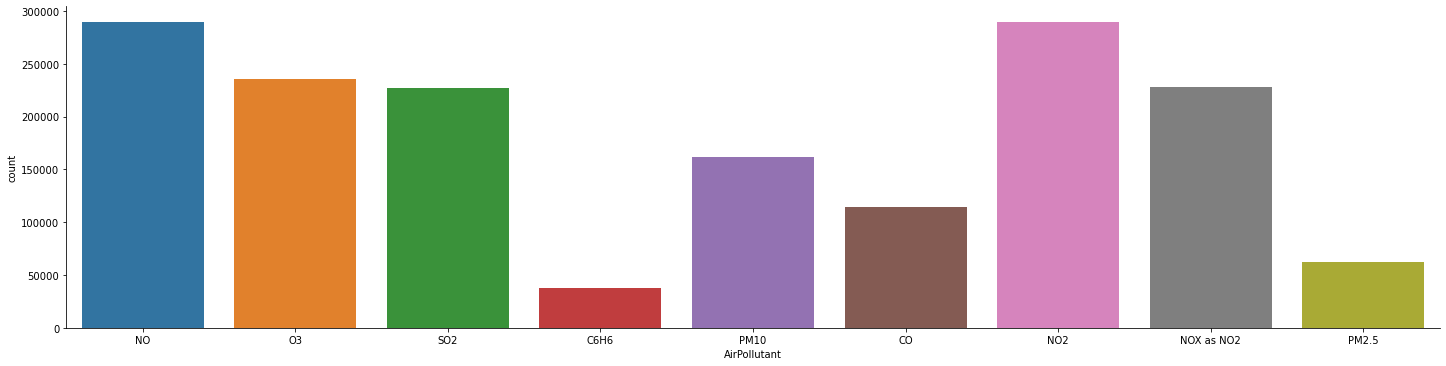

In [22]:
# Bar plot of the sum of measurements for each pollutant
sns.catplot(x = "AirPollutant", kind = "count",  data = combined_df, height=5, aspect = 4)

---
### Differenciate each pollutant and remove outliers

In [ ]:
def remove_outliers(df):
  return df[((df.Concentration - df.Concentration.mean()) / df.Concentration.std()).abs() < 3]

# Separamos por tipo de contaminante
df_NO = combined_df.loc[combined_df['AirPollutant'] == 'NO']
df_SO2 = combined_df.loc[combined_df['AirPollutant'] == 'SO2']
df_NO2 = combined_df.loc[combined_df['AirPollutant'] == 'NO2']
df_NOX = combined_df.loc[combined_df['AirPollutant'] == 'NOX as NO2']
df_CO = combined_df.loc[combined_df['AirPollutant'] == 'CO']
df_O3 = combined_df.loc[combined_df['AirPollutant'] == 'O3']
df_PM25 = combined_df.loc[combined_df['AirPollutant'] == 'PM2.5']
df_PM10 = combined_df.loc[combined_df['AirPollutant'] == 'PM10']
df_C6H6 = combined_df.loc[combined_df['AirPollutant'] == 'C6H6']

# Identificamos y eliminamos outliers de cada nuevo dataframe
df_NO = remove_outliers(df_NO)
df_SO2 = remove_outliers(df_SO2)
df_NO2 = remove_outliers(df_NO2)
df_NOX = remove_outliers(df_NOX)
df_CO = remove_outliers(df_CO)
df_O3 = remove_outliers(df_O3)
df_PM25 = remove_outliers(df_PM25)
df_PM10 = remove_outliers(df_PM10)
df_C6H6 = remove_outliers(df_C6H6)

---
### Visualize in the map of each pollutant

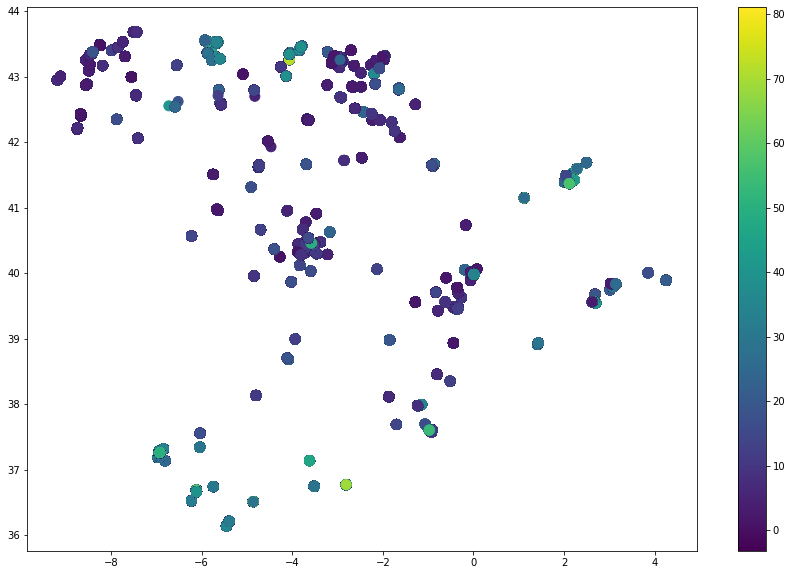

In [30]:
# You can change here the pollutant for one of the last cell to visualize the data of each one.

x = df_PM10["Longitude"].to_numpy()    
y = df_PM10["Latitude"].to_numpy()
z = df_PM10["Concentration"].to_numpy()

fig = plt.figure(figsize = (15,10))
plt.scatter(x, y, c=z, s=100)
plt.colorbar();
plt.show()

---
# FINAL REPORT

As we can see in the maps generated in this notebook, there are clearly some zones in Spain with a much more elevated level of air polution than others. It is true that there are also zones with little measurements because of the absence of air quality measurements stations nearby.

In the end, we can conclude that the biggest cities in Spain (Madrid, Barcelona, Bilbao), are the ones with the worst air quality. But there are also some smalles cities with a high pollution level.

The final conclusion, addressing the initial problem from which this study derives, is that the zones a foreign person looking for a clean air in Spain shoulkd take into account are Almería, Tarragona and Cantabria.